In [58]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, auc
from datetime import datetime


In [59]:
df = pd.read_csv('./bq_predicts/bq_automl_24042025.csv', dtype={'user_pseudo_id': str})
df['user_pseudo_id'] = df['user_pseudo_id'].astype(str)
df.head()

,user_pseudo_id,conversion_flag,predicted_conversion_flag,conversion_probability
0,1362308660.1743474749,0,1,0.778237
1,1872739497.1744371037,0,1,0.783857
2,257964603.1743894407,0,1,0.658416
3,2138261420.1744857428,0,1,0.833658
4,1103271703.1745137839,0,1,0.829424


probability_group
0-10%      31404
10-20%       113
20-30%       376
30-40%       293
40-50%       143
50-60%        11
60-70%        42
70-80%       116
80-90%       132
90-100%       39
Name: count, dtype: int64


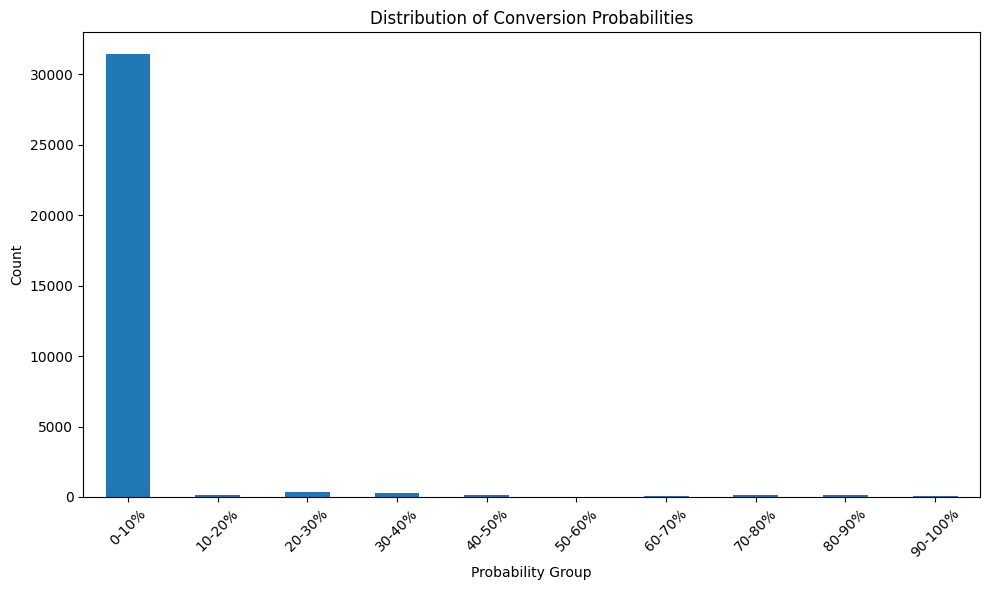

In [60]:
#classify conversion_probabilty in groups [0% to 10%], [10% to 20%], [20% to 30%], [30% to 40%], [40% to 50%], [50% to 60%], [60% to 70%], [70% to 80%], [80% to 90%], [90% to 100%
# Create bins for conversion probability from 0% to 100% in 10% increments
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']

# Classify conversion probabilities into bins
df['probability_group'] = pd.cut(df['conversion_probability'], bins=bins, labels=labels, include_lowest=True)

# Display the count of records in each bin
prob_group_counts = df['probability_group'].value_counts().sort_index()
print(prob_group_counts)

# Visualize the distribution
plt.figure(figsize=(10, 6))
prob_group_counts.plot(kind='bar')
plt.title('Distribution of Conversion Probabilities')
plt.xlabel('Probability Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





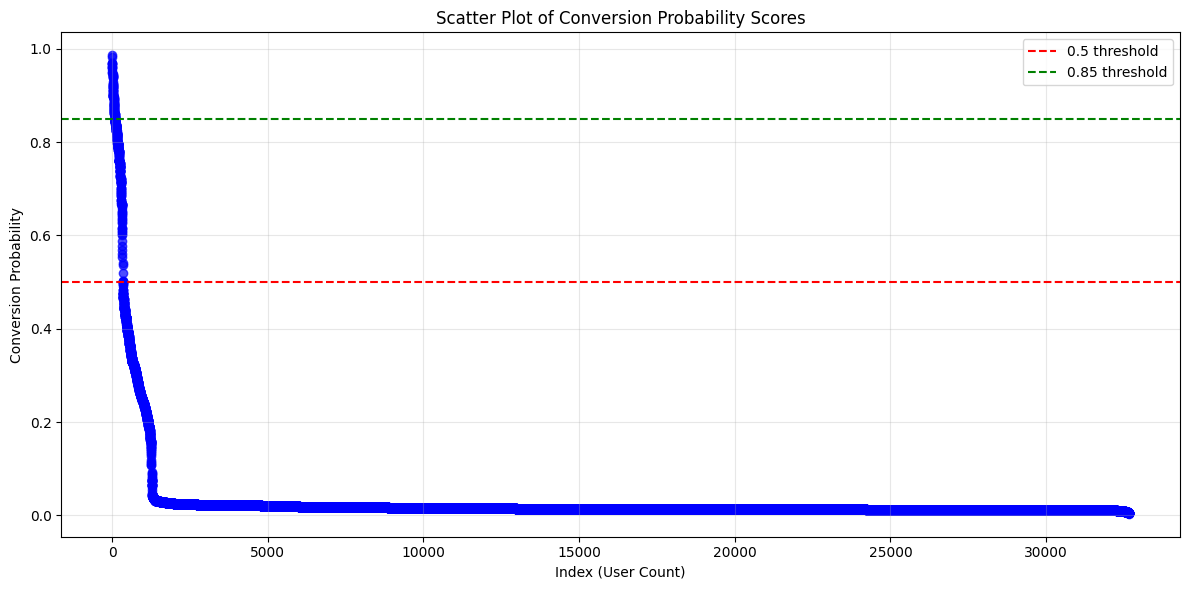

In [61]:
# Create a scatter plot of just the conversion probability scores
plt.figure(figsize=(12, 6))

#order DF by conversion_probability
df = df.sort_values(by='conversion_probability', ascending=False)

# Use index as x-axis to spread out the points
plt.scatter(range(len(df)), df['conversion_probability'], alpha=0.7, color='blue')

# Add a horizontal line at common threshold values
plt.axhline(y=0.5, color='red', linestyle='--', label='0.5 threshold')
plt.axhline(y=0.85, color='green', linestyle='--', label='0.85 threshold')

# Add labels and title
plt.xlabel('Index (User Count)')
plt.ylabel('Conversion Probability')
plt.title('Scatter Plot of Conversion Probability Scores')

# Add legend and grid
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

In [62]:
bins = [0, 0.3, 0.85, 1.0] 
labels = ['LOW', 'MEDIUM', 'HIGH']

df['conversion_probability_group'] = pd.cut(df['conversion_probability'], 
                                           bins=bins, 
                                           labels=labels, 
                                           include_lowest=True)


prob_group_counts = df['conversion_probability_group'].value_counts().sort_index()
print(prob_group_counts)


conversion_probability_group
LOW       31893
MEDIUM      687
HIGH         89
Name: count, dtype: int64


In [57]:
df

,user_pseudo_id,conversion_flag,predicted_conversion_flag,conversion_probability,probability_group,conversion_probability_group
32645,1857906755.1676953635,0,0,0.996494,90-100%,HIGH
22370,2145638737.1744923502,0,0,0.995474,90-100%,HIGH
32239,187862488.1745287617,0,0,0.995436,90-100%,HIGH
30173,1648637851.1744109025,0,0,0.994999,90-100%,HIGH
2174,522953171.1743411114,0,0,0.994795,90-100%,HIGH
...,...,...,...,...,...,...
222,1609787985.1745280942,0,1,0.031388,0-10%,LOW
273,361695089.1743758779,0,1,0.030972,0-10%,LOW
191,978186490.1742971798,0,1,0.030365,0-10%,LOW
297,1600592308.1744961381,0,1,0.017411,0-10%,LOW


In [50]:
#write to csv
df.to_csv(f'./output/audience_bq_rfc_{datetime.now().strftime("%d%m%Y")}.csv', index=False)